In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
import math

In [3]:
data = pd.read_csv('travel_data.tsv', sep='\t', parse_dates=[1])

In [4]:
data.head()

,ga:pagePath,ga:date,ga:sessions
0,www.travelocity.com/flights-search,2017-01-04,364537
1,www.travelocity.com/flights-search,2017-01-05,332169
2,www.travelocity.com/flights-search,2016-12-06,272280
3,www.travelocity.com/,2017-01-03,268885
4,www.travelocity.com/flights-search,2017-01-02,267440


In [5]:
gData = data.groupby(['ga:pagePath', 'ga:date']).sum()

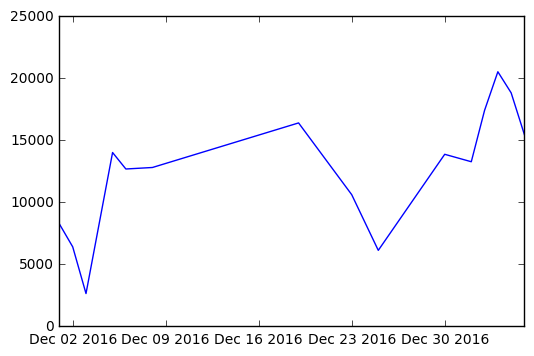

In [6]:
plt.plot(gData.ix['(other)'])

In [7]:
gData.ix['www.travelocity.com/']

,ga:sessions
ga:date,
2016-12-01,191696
2016-12-02,170833
2016-12-03,139675
2016-12-04,177041
2016-12-05,213344
2016-12-06,211459
2016-12-08,178916
2016-12-11,154482
2016-12-12,186320


In [8]:
data2 = gData

In [9]:
data2

ga:sessions
ga:pagePath                                        ga:date                
(other)                                            2016-12-01         8259
                                                   2016-12-02         6419
                                                   2016-12-03         2652
                                                   2016-12-05        14026
                                                   2016-12-06        12698
                                                   2016-12-08        12819
                                                   2016-12-19        16413
                                                   2016-12-23        10627
                                                   2016-12-25         6137
                                                   2016-12-30        13883
                                                   2017-01-01        13283
                                                   2017-01-02        17426
                                                   2017-01-03        20539
                                                   2017-01-04        18839
                                                   2017-01-05        15463
www.travelocity.com/                               2016-12-01       191696
                                                   2016-12-02       170833
                                                   2016-12-03       139675
                                                   2016-12-04       177041
                                                   2016-12-05       213344
                                                   2016-12-06       211459
                                                   2016-12-08       178916
                                                   2016-12-11       154482
                                                   2016-12-12       186320
                                                   2016-12-13       188642
                                                   2016-12-14       175344
                                                   2016-12-16       149314
                                                   2016-12-17       133416
                                                   2016-12-18       151347
                                                   2016-12-19       177518
...                                                                    ...
www.travelocity.com/trips                          2016-12-26         3539
                                                   2016-12-27         3634
                                                   2017-01-01         2718
                                                   2017-01-02         3204
                                                   2017-01-05         3384
www.travelocity.com/tzaneen-hotels-coach-house-... 2016-12-19          115
www.travelocity.com/vacation-packages              2016-12-01         9469
                                                   2016-12-02         8286
                                                   2016-12-03         8355
                                                   2016-12-06        10591
                                                   2016-12-08         9909
                                                   2016-12-12         9282
                                                   2016-12-15         7899
                                                   2016-12-23         6994
                                                   2016-12-25         7363
                                                   2016-12-31        11296
                                                   2017-01-01        14432
                                                   2017-01-02        16351
                                                   2017-01-03        16185
                                                   2017-01-04        16082
                                                   2017-01-05        14449
www.traveloci

In [10]:
data2.head()

ga:sessions
ga:pagePath ga:date                
(other)     2016-12-01         8259
            2016-12-02         6419
            2016-12-03         2652
            2016-12-05        14026
            2016-12-06        12698

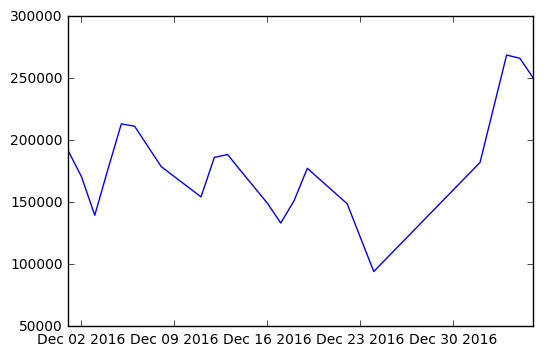

In [11]:
plt.plot(data2.ix['www.travelocity.com/'])

In [12]:
data2.ix['www.travelocity.com/']

,ga:sessions
ga:date,
2016-12-01,191696
2016-12-02,170833
2016-12-03,139675
2016-12-04,177041
2016-12-05,213344
2016-12-06,211459
2016-12-08,178916
2016-12-11,154482
2016-12-12,186320


In [13]:
data2 = pd.read_csv('travel_data.tsv', sep='\t', parse_dates=[1])

In [14]:
data2 = data2.groupby(['ga:pagePath', 'ga:date']).sum()

In [15]:
sess = data2.ix['www.travelocity.com/']['ga:sessions']
sess = sess.reset_index()
del sess['ga:date']
sess.head()

,ga:sessions
0,191696
1,170833
2,139675
3,177041
4,213344


In [16]:
type(sess['ga:sessions'][0])

numpy.int64

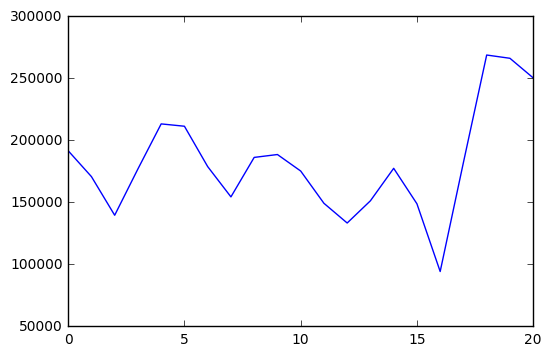

In [17]:
plt.plot(sess)

In [33]:
def test_arima(orders, x):
        # slice up the orders
        order = orders[:3]
        seasonal_order = orders[3:]
        # hardcode insert seven period seasonality
        # this will need to become more dynamic later when we deal with
        # multi day long periods
        seasonal_order = np.insert(seasonal_order, 3, 7)
        try:
            fit = sm.tsa.statespace.SARIMAX(x.astype(float), trend='n', order=order, seasonal_order=seasonal_order).fit()
            rmse = rmse(fit.resid)
            if math.isnan(rmse):
                print fit.resid
                return float('inf')
            return rmse
        except Exception as err:
            return float('inf')

In [34]:
from scipy.optimize import brute
grid = (slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1))
res = brute(test_arima, grid, args=(sess,), finish=None, full_output=False)

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [25]:
res

array([ 2.,  1.,  2.,  0.,  0.,  0.])

In [48]:
fit = sm.tsa.statespace.SARIMAX(sess, trend='n', order=(1,2,0) , seasonal_order=(0,2,0,7)).fit()
fit2 = sm.tsa.statespace.SARIMAX(sess, trend='n', order=(2, 0, 0), seasonal_order=(0, 0, 0, 7)).fit()

In [49]:
# fit2.predict(start=20, end=30, dynamic=True).values
sess

,ga:sessions
0,191696
1,170833
2,139675
3,177041
4,213344
5,211459
6,178916
7,154482
8,186320
9,188642


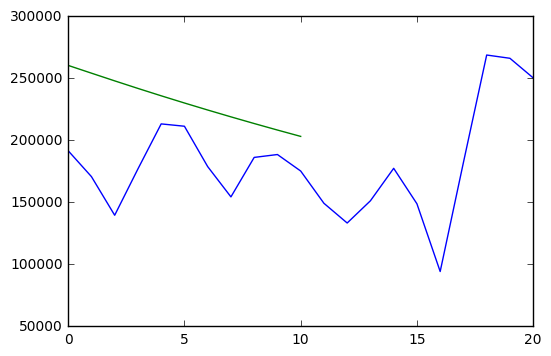

In [54]:
plt.plot(sess)
# plt.plot(fit.predict(start=20, end=25, dynamic=True))
# plt.plot(fit.fittedvalues, color='red', label='bad forecast')
plt.plot(fit2.predict(start=20, end=30, dynamic=True).values)
# plt.plot(fit2.fittedvalues, label='good forecast')
plt.legend()

In [23]:
print fit.fittedvalues.head()
print sess.head()

NameError: name 'fit' is not defined

In [21]:
def rmse(resid):
    rmse = 0
    for r in resid:
        rmse += math.sqrt(r**2)
        
    return rmse

In [22]:
rmse(fit.resid)

NameError: name 'fit' is not defined

In [70]:
rmse(fit2.resid)

661741.2865310437

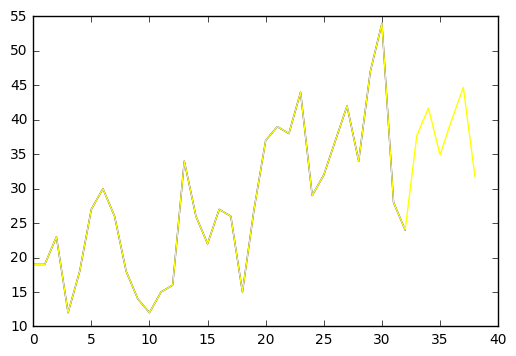

In [79]:
a = [19, 19, 23, 12, 18, 27, 30, 26, 18, 14, 12, 15, 16, 34, 26, 22, 27, 26, 15, 27, 37, 39, 38, 44, 29, 32, 37, 42, 34, 47, 54, 28, 24]
b = [37.7, 41.7, 34.9, 40, 44.7, 31.8]
plt.plot(a, color='blue')
plt.plot(a+b, color='yellow')